1. Load the dataset into python environment 
2. Do all the necessary pre-processing steps 
3. Create kNN and SVM models 
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the 
average accuracy score of the models

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
tita = pd.read_csv("C:/Users/Ammu/Downloads/titanic_dataset.csv")
tita

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Make the passenger id to be the index of the dataset.
tita = tita.set_index('PassengerId')

In [4]:
# basic information on the dataset - Missing value
tita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# drop the column called 'Cabin', since the number of missing values are too few
tita=tita.drop(['Name','Ticket','Cabin'],axis=1)

In [6]:
# Column, "Age" has missing values and can be filled in using the median of the column
tita['Age'] = tita['Age'].fillna(tita['Age'].median())

In [7]:
# Use the SimpleImputer to substitute the missing values
from sklearn.impute import SimpleImputer

In [8]:
# Column, "Embarked" has missing values and can be filled in 
# using the mode of the column,since the datatype is object
imputer = SimpleImputer(strategy = 'most_frequent')
tita['Embarked'] = imputer.fit_transform(tita[['Embarked']])
tita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [9]:
# no missing values
tita

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [10]:
# Encode object types, 'Sex','Embarked'.
tita = pd.get_dummies(tita)
tita

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1,2,23.4500,1,0,0,0,1


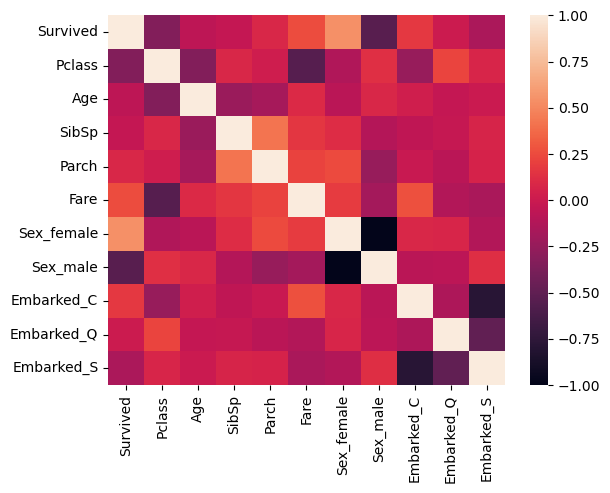

In [11]:
sns.heatmap(tita.corr())
plt.show()

In [12]:
# deciding on X and y
x = tita.drop('Survived',axis=1)
y=tita['Survived']

In [13]:
# Now split data into test and training data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Use Support Ventor machine to classify
from sklearn.svm import SVC

In [15]:
# Fit the data using SVM
svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)

In [16]:
# To measure accuracy of the model, use accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_svm)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_svm))

Accuracy: 0.659217877094972
[[99  6]
 [55 19]]


In [18]:
#K fold cross validation 
from sklearn.model_selection import KFold, cross_val_score

In [19]:
# K-Fold Cross Validation
kfold = KFold(n_splits=5)
k_score_svm = cross_val_score(svm, x, y, cv=kfold)

In [20]:
k_acc_svm = k_score_svm.mean()
print(k_acc_svm)

0.6656204883560353


In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
stratified_kfold = StratifiedKFold(n_splits=5)
strat_score_svm = cross_val_score(svm, x, y, cv=stratified_kfold)

In [23]:
# Print the accuracy scores for each fold
for fold, score in enumerate(k_score_svm):
    print(f"Fold {fold+1}: Accuracy = {score}")

Fold 1: Accuracy = 0.5977653631284916
Fold 2: Accuracy = 0.6741573033707865
Fold 3: Accuracy = 0.6797752808988764
Fold 4: Accuracy = 0.6685393258426966
Fold 5: Accuracy = 0.7078651685393258


In [24]:
strat_acc_svm = strat_score_svm.mean()
strat_acc_svm

0.6734982110350888

In [25]:
# Use KNN to classify the data
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Fit the data using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [28]:
# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_knn)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_knn))

Accuracy: 0.7262569832402235
[[91 14]
 [35 39]]


In [29]:
# K-fold for knn
kfold = KFold(n_splits=5)
k_score_knn = cross_val_score(knn, x, y, cv=kfold)

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [30]:
# average accuracy score
k_acc_knn = k_score_knn.mean()
print("Average Accuracy:", k_acc_knn)

Average Accuracy: 0.7037474107086812


In [31]:
strat_score_knn = cross_val_score(knn, x, y, cv=stratified_kfold)

C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ammu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [32]:
for fold, score in enumerate(strat_score_knn):
    print(f"Fold {fold+1}: Accuracy = {score}")

Fold 1: Accuracy = 0.6703910614525139
Fold 2: Accuracy = 0.6741573033707865
Fold 3: Accuracy = 0.7134831460674157
Fold 4: Accuracy = 0.7359550561797753
Fold 5: Accuracy = 0.7247191011235955


In [33]:
# Average accuracy score using Stratified K-Fold Cross Validation
strat_acc_knn = strat_score_knn.mean()
print("Average Accuracy:", strat_acc_knn)

Average Accuracy: 0.7037411336388174


SVM has an Accuracy of 72.63% without cross validation
Using k-fold, SVM has an accuracy of 66.56%
Using stratified k-fold, SVM has an accuracy of 67.35%

KNN has an Accuracy of 72.63% without cross validation, which is the same as the SVM classification
Using k-fold, KNN has an accuracy of 70.38%
Using stratified k-fold, KNN has an accuracy of 70.37%